<a href="https://colab.research.google.com/github/Pavan250599/CarPrice-Predictor-for-CarDekho/blob/main/Predicting_Car_Prices_for_Car_Dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

In this project, we aim to predict the prices of old and refurbished cars sold by an Indian company. With the growing market for pre-owned vehicles, accurately determining the price of such cars based on their various features is crucial for both sellers and buyers. This project involves developing a linear regression model to effectively predict car prices using a dataset of approximately 1700 data points.

The dataset includes various features such as make and model, year of manufacture, mileage, fuel type, transmission type, condition, number of previous owners, and additional features like air conditioning and power steering. The main steps include preprocessing the data, analyzing feature relationships, building and training the linear regression model, and evaluating its performance.

Accurate price prediction models can enhance the transparency and efficiency of the used car market, helping sellers set competitive prices and buyers make informed decisions. This project serves as a valuable example of applying machine learning techniques to real-world problems in the automotive sector.

**Data Dictionary**

**Company** - Car's company

**Name** - Name of the car model

**Year** - Make year of the car

**Selling Price** -	Selling price of the car (Dependent variable)

**Kilometer driven** -	Total kms driven by the car

**Fuel** -	Cars fuel type

**Seller Type** - Type of the seller

**Transmission** -	If the car is automatic or manual

**Owner** -	Owner type of the car

<a id="lib"></a>
# Import Libraries

In [ ]:
#Importing the libraries which will be helpful for the data analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<a id="prep"></a>
# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Linear Regression/Car_Details_Car_Dekho.csv'

In [ ]:
dataset = pd.read_csv(file_path)

<a id="read"></a>
# Understand the data

In [ ]:
#Here are the few commands which will help us to understand the basic data
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        1720 non-null   object
 1   name           1720 non-null   object
 2   year           1720 non-null   int64 
 3   selling_price  1720 non-null   int64 
 4   km_driven      1720 non-null   int64 
 5   fuel           1720 non-null   object
 6   seller_type    1720 non-null   object
 7   transmission   1720 non-null   object
 8   owner          1720 non-null   object
dtypes: int64(3), object(6)
memory usage: 121.1+ KB


In [ ]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

1720

In [ ]:
dataset.describe()

,year,selling_price,km_driven
count,1720.000000,1.720000e+03,1720.000000
mean,2012.659884,3.595410e+05,63336.986047
std,4.618048,2.445697e+05,44724.303652
min,1992.000000,3.000000e+04,1000.000000
25%,2010.000000,1.600000e+05,35000.000000
50%,2014.000000,3.000000e+05,60000.000000
75%,2016.000000,5.099990e+05,80825.250000
max,2020.000000,1.800000e+06,806599.000000


In [ ]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [ ]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

9

# <a id="eda"></a>
# Exploratory Data Analysis

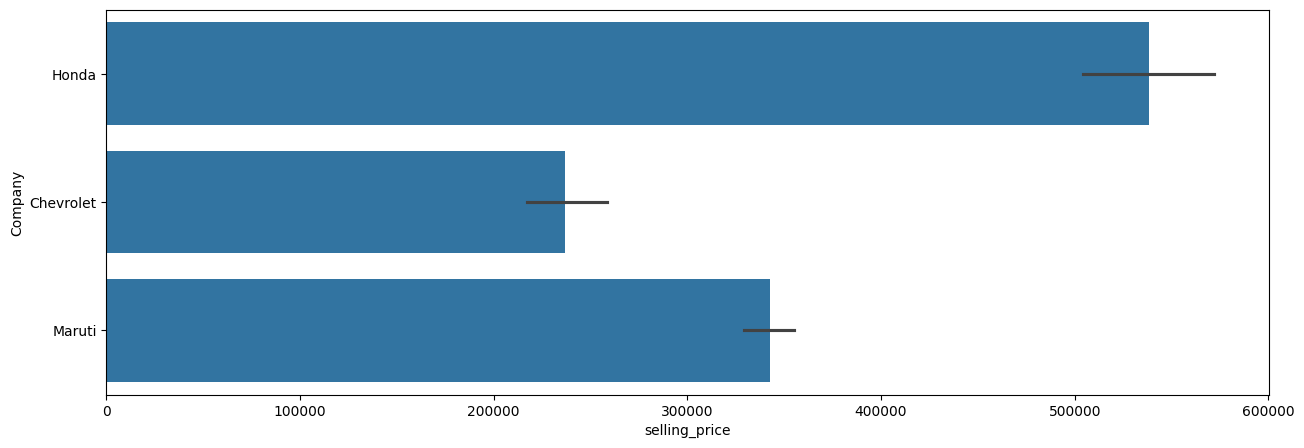

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Company',x='selling_price')
plt.show()

**Honda Cars are having overall higher selling price**

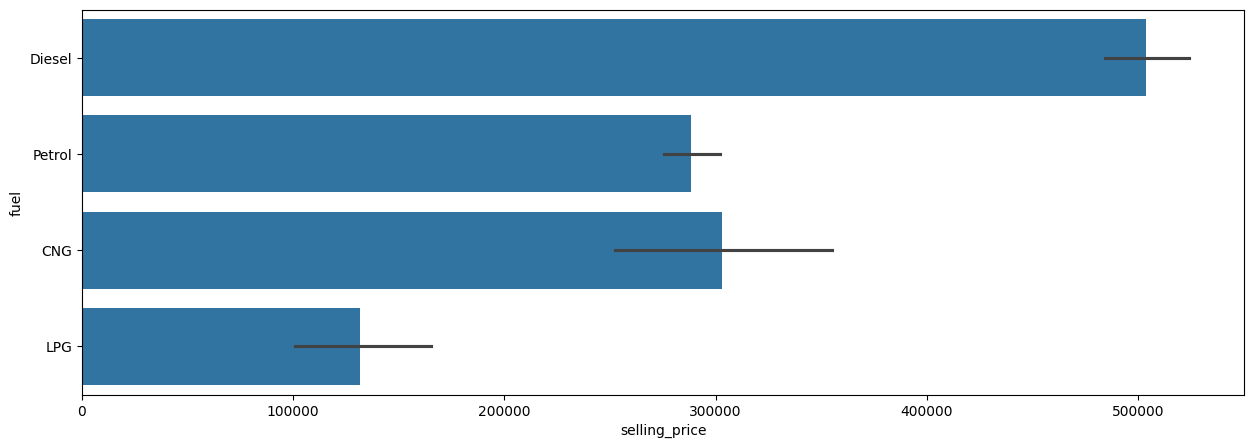

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'fuel',x='selling_price')
plt.show()

**Diesel cars are having higher selling price**

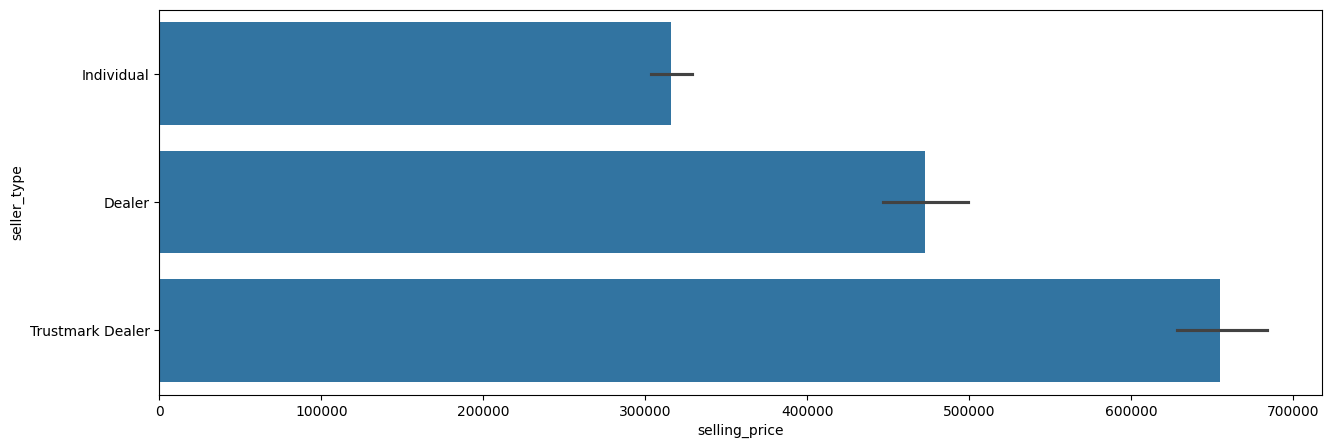

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'seller_type',x='selling_price')
plt.show()

**Trustmark dealers are having higher selling price**

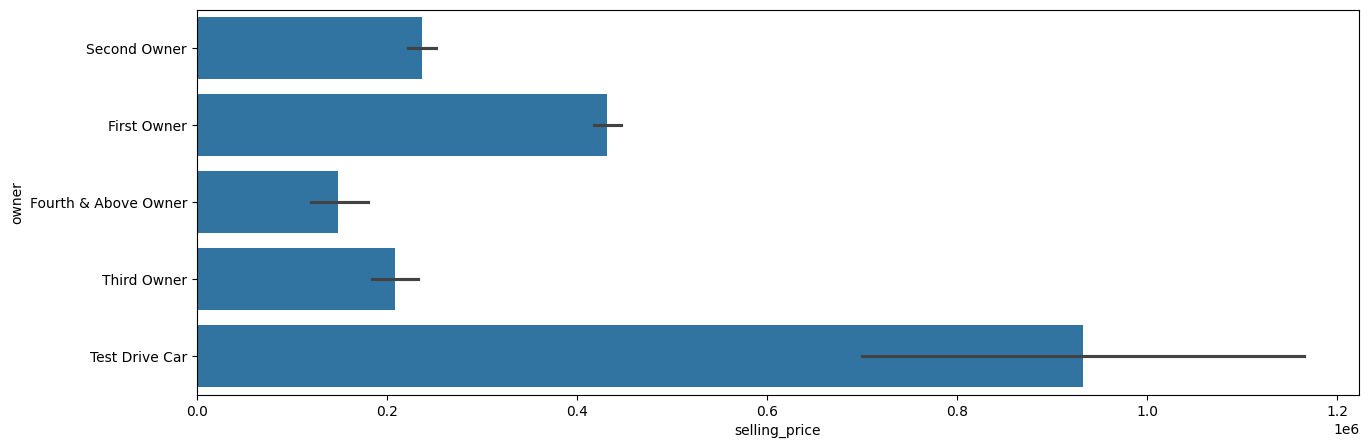

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'owner',x='selling_price')
plt.show()

**Test Drive cars are having higher price**

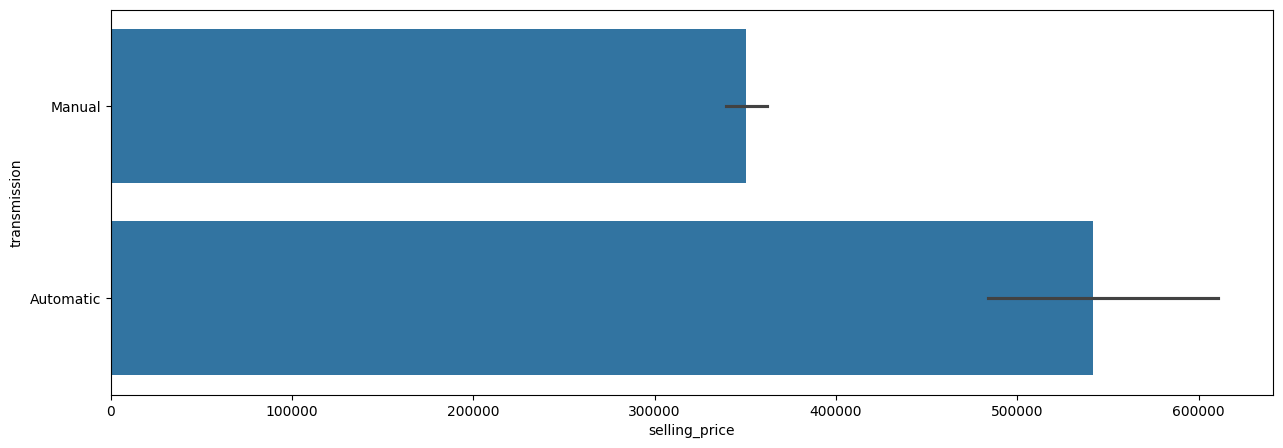

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'transmission',x='selling_price')
plt.show()

**Automatic Cars are having higher selling price**

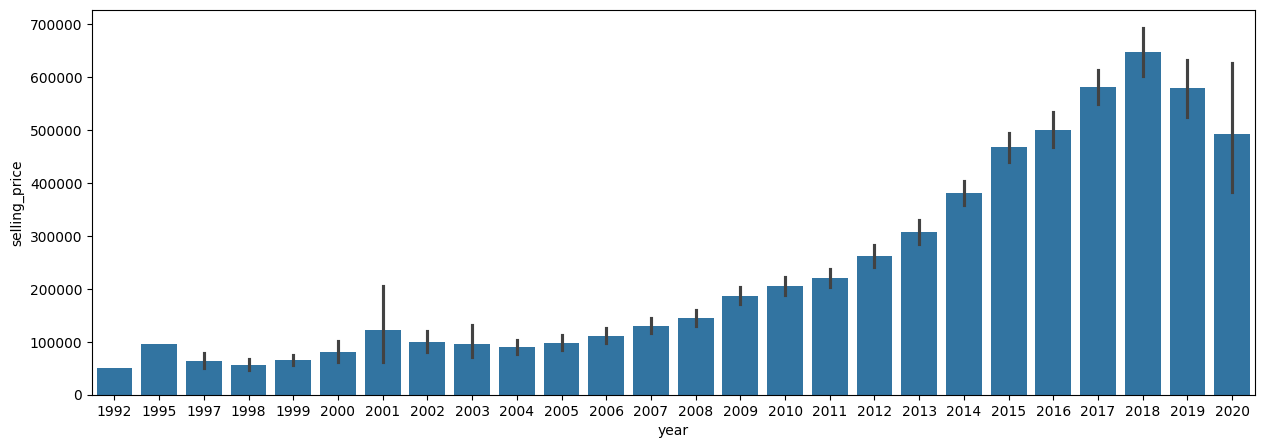

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'year',y='selling_price')
plt.show()

**Newer the car is, higher the selling price it will have**

<Figure size 1500x500 with 0 Axes>

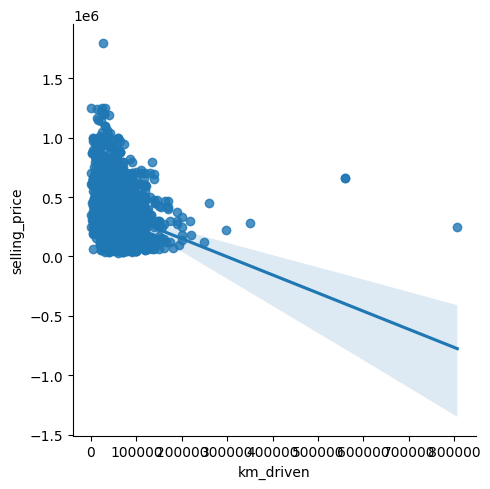

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'km_driven',y='selling_price')
plt.show()

**If the Kilometer driven are lesser more the price is**

<a id="outlier"></a>
# Outlier Treatment

In [ ]:
#Outlier Treatment
def treat_outliers(df):
  # Only apply outlier treatment to numerical columns
  numerical_cols = df.select_dtypes(include=['number']).columns
  Q1 = df[numerical_cols].quantile(0.25)
  Q3 = df[numerical_cols].quantile(0.75)
  IQR = Q3 - Q1


  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df_no_outliers = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
  return df_no_outliers

# Apply the function to the DataFrame
dataset = treat_outliers(dataset)

In [ ]:
len(dataset)

1632

<Figure size 1500x500 with 0 Axes>

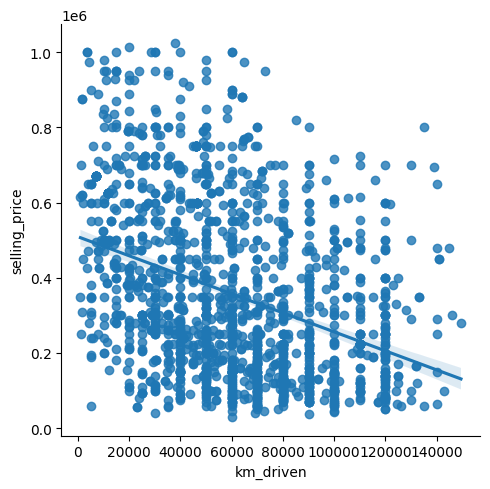

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'km_driven',y='selling_price')
plt.show()

<a id="null"></a>
# Missing Value Treatment

In [ ]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

,0
Company,0.0
name,0.0
year,0.0
selling_price,0.0
km_driven,0.0
fuel,0.0
seller_type,0.0
transmission,0.0
owner,0.0


**In this dataset there are no missing values so we are good to proceed to the next steps.**

# <a id="enc"></a>
# Encoding

In [ ]:
# Separating the numerical and categorical columns
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

In [ ]:
dataset

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1,79,2014,450000,141000,1,1,1,2
1,1,79,2014,450000,141000,1,1,1,2
2,1,110,2018,930000,14500,3,0,1,0
3,1,117,2014,560000,74000,1,1,1,2
4,1,118,2014,675000,90000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1714,2,195,2006,75000,130000,3,1,1,0
1715,2,159,2014,195000,75000,3,1,1,2
1716,2,173,2015,155000,40000,3,1,1,0
1718,2,305,2012,225000,90000,1,1,1,2


<a id="spl"></a>
# Splitting the data into Train and Test

In [ ]:
x = dataset.iloc[:,[0,2,4,5,6,7,8]].values

In [ ]:
y=dataset.iloc[:,3].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

<a id="assum"></a>
# Assumptions of Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor_ini = LinearRegression()
regressor_ini.fit(x_train, y_train)

# Returning the R^2 for the model
regressor_ini_R2 = regressor_ini.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))

R^2: 0.5824576222264697


In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


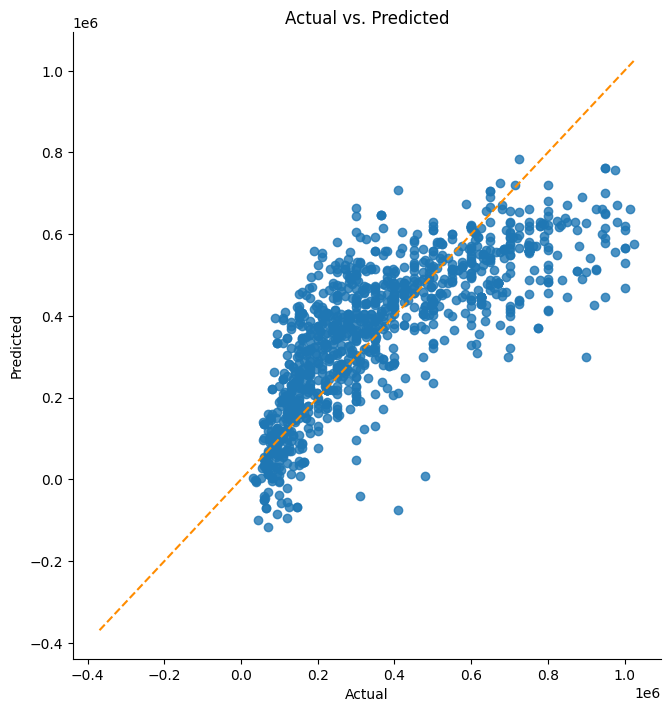

In [ ]:
linear_assumption(regressor_ini, x_train, y_train)

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 4.094497135888149e-14
Residuals are not normally distributed


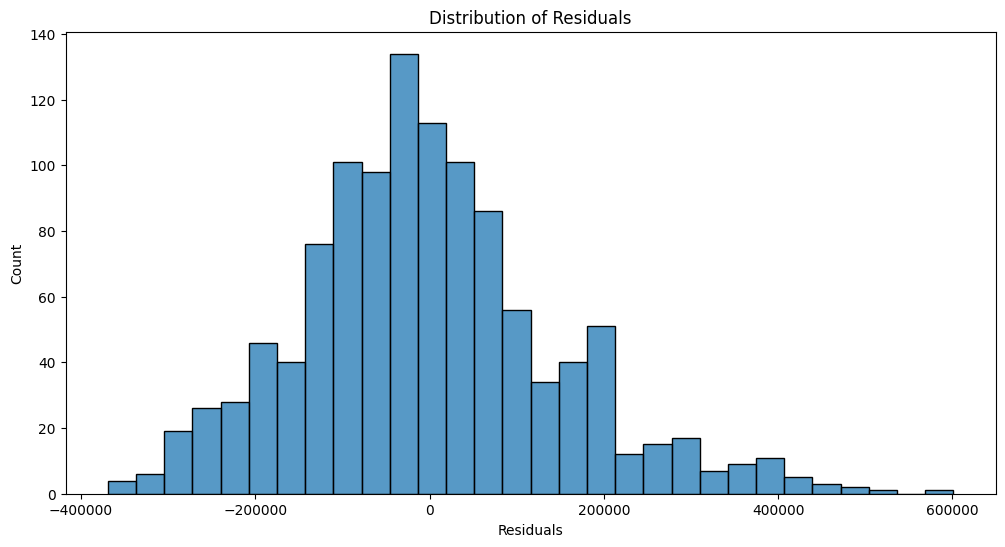


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(regressor_ini, x_train, y_train)

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction

                       This assumption being violated causes issues with interpretability of the
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')

    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


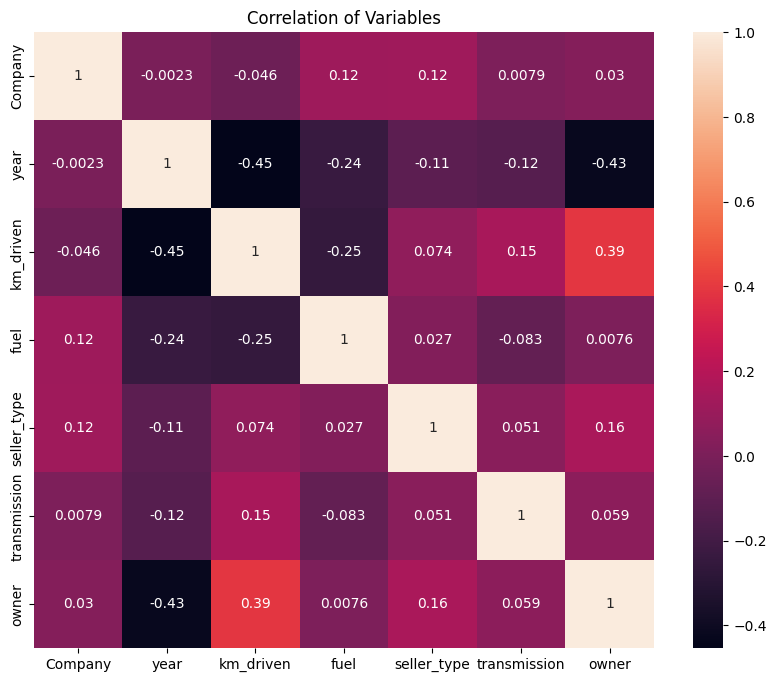

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Company: 7.172911001718228
year: 36.3548824744738
km_driven: 5.5842360551678265
fuel: 6.911245591732554
seller_type: 4.512958996667669
transmission: 20.21944391625892
owner: 1.7465502831897566

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [ ]:
multicollinearity_assumption(regressor_ini, x_train, y_train, dataset.iloc[:,[0,2,4,5,6,7,8]].columns.values)

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')

    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [ ]:
autocorrelation_assumption(regressor_ini, x_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9782352019119487
Little to no autocorrelation 

Assumption satisfied


In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')

    print('Residuals should have relative constant variance')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


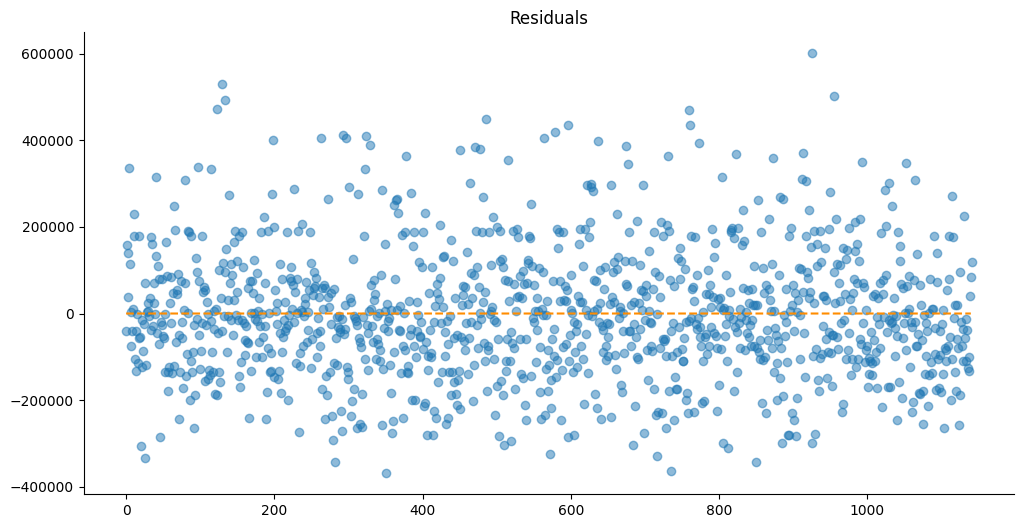

In [ ]:
homoscedasticity_assumption(regressor_ini, x_train, y_train)

<a id="model"></a>
# Building the MLR Model

In [ ]:
#Adding the constant 1 to get the Y-Intercept value
x_train = np.append(arr=x_train, values = np.ones((1142,1)).astype(int), axis=1)

In [ ]:
#Adding the constant 1 to get the Y-Intercept value
x_test = np.append(arr=x_test, values = np.ones((490,1)).astype(int), axis=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
regressor_ini = sm.OLS(endog=y_train, exog=x_train).fit()

In [ ]:
regressor_ini.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          5.22e-210
Time:                        12:00:03   Log-Likelihood:                -15233.
No. Observations:                1142   AIC:                         3.048e+04
Df Residuals:                    1134   BIC:                         3.052e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           2.22e+04   6731.704      3.297      0.001    8988.344    3.54e+04
x2          2.992e+04   1382.854     21.639      0.000    2.72e+04    3.26e+04
x3            -1.0012      0.174     -5.759      0.000      -1.342      -0.660
x4         -7.327e+04   5178.291    -14.149      0.000   -8.34e+04   -6.31e+04
x5          1.438e+04   9871.879      1.457      0.145   -4985.565    3.38e+04
x6          -9.57e+04   2.07e+04     -4.625      0.000   -1.36e+05   -5.51e+04
x7         -1.278e+04   4255.615     -3.004      0.003   -2.11e+04   -4435.085
const      -5.959e+07    2.8e+06    -21.318      0.000   -6.51e+07   -5.41e+07
==============================================================================
Omnibus:                       60.118   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.611
Skew:                           0.535   Prob(JB):                     2.82e-16
Kurtosis:                       3.601   Cond. No.                     4.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred_ini = regressor_ini.predict(x_test)

<a id="signi_var"></a>
# MLR Model after Removing Insignificant Variables

As the P value is more that 0.05 we wil remove the feature **X5**, P values helps us to understand if the variable is significant or not

The test hypothesis for P value for variables is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: All β's are equal to zero </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: At least one β is not equal to zero </strong> (i.e. regression model is significant) </p>

If the P-value is coming out more than 0.05 we reject the variable as it is insignificant, however if the varibles are having P-value less than 0.05 than the variable is considered as the significant variable


In [ ]:
x = dataset.iloc[:,[0,2,4,5,7,8]].values
y = dataset.iloc[:,3:4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
regressor_tuned = sm.OLS(endog=y_train, exog=x_train).fit()

In [ ]:
y_pred_tuned = regressor_tuned.predict(x_test)

In [ ]:
regressor_tuned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              956.4
Date:                Mon, 03 Feb 2025   Prob (F-statistic):                        0.00
Time:                        12:00:04   Log-Likelihood:                         -15409.
No. Observations:                1142   AIC:                                  3.083e+04
Df Residuals:                    1136   BIC:                                  3.086e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.659e+04   8002.947      3.322      0.001    1.09e+04    4.23e+04
x2           438.5467     15.391     28.494      0.000     408.349     468.744
x3            -2.6274      0.180    -14.564      0.000      -2.981      -2.273
x4         -1.115e+05   5439.904    -20.500      0.000   -1.22e+05   -1.01e+05
x5         -1.333e+05   2.43e+04     -5.489      0.000   -1.81e+05   -8.57e+04
x6         -3.573e+04   4663.753     -7.660      0.000   -4.49e+04   -2.66e+04
==============================================================================
Omnibus:                       45.786   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.288
Skew:                           0.504   Prob(JB):                     1.20e-11
Kurtosis:                       3.204   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="eval"></a>
# Model Evaluation

**The F-statistic**
Compare the p-value for the F-test to your significance level. If the p-value is less than the significance level, your sample data provide sufficient evidence to conclude that your regression model fits the data better than the model with no independent variables.
In our model the p value is less than the significance level, which is a good sign

**AIC/BIC** Lower the AIC/BIC Values better the model fit is. There is no specific threshold to the values but overall in our model it is looking good.

**Skewness and Kurtosis** The residual errors are positively skewed with a skewness of 0.268 and also have an excess kurtosis of 3.352 i.e. Thicker Tails

**Normality tests based on Skewness and Kurtosis**

While Skewness and Kurtosis quantify the amount of departure from normality, one would want to know if the departure is statistically significant. The following two tests let us do just that:

The Omnibus K-squared test

The Jarque–Bera test

In both tests, we start with the following hypotheses:

Null hypothesis (H_0): The data is normally distributed.

Alternate hypothesis (H_1): The data is not normally distributed, in other words, the departure from normality, as measured by the test statistic, is statistically significant.

**The Omnibus test and the JB test have both produced test-statistics (54.671 and 61.619 respectively), which lie outside the H_0 acceptance zone of the Chi-squared. Thus we will reject the Null hypothesis H_0, i.e. the residuals are not normally distributed.**

**Durbin Watson Test** It is a test to check the autocorrelation and the ideal value we can expect is between 1.5 to 2.50. In our example the value is **1.994** which is good and proves there is no autocolleration. Also, we can see in the below autocorrelation function chart it is looking good.

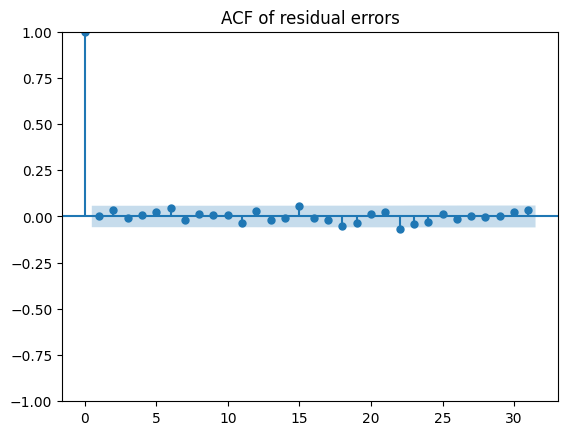

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(regressor_ini.resid, title='ACF of residual errors')
plt.show()

**Condition Number** Higher the value or we can say more that 30 means there is a multicolinearity. In our example, the value is very high. There is a multicolinearity in the dataset.

<a id="ml_perf"></a>
# Model Performance

In [ ]:
class Model_Performance:
    def __init__(self,actual,predicted,count):
        self.actual = actual
        self.predicted = predicted
        self.count = count

    def mape(self):
        return (np.mean(np.abs((self.actual - self.predicted) / self.actual)))*(1/self.count)

    def mae(self):
        return (np.mean(np.abs((self.actual - self.predicted))))*(1/self.count)

    def mse(self):
        return (np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count)

    def rmse(self):
        return np.sqrt((np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count))

In [ ]:
mp = Model_Performance(y_test,y_pred_ini,len(y_test))
regression_ini = {'MODEL NAME':['Regression_Ini'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [ ]:
regression_ini

{'MODEL NAME': ['Regression_Ini'],
 'MAPE': [0.002262322698435216],
 'MAE': [488.58475144113487],
 'MSE': [116970379.07698981],
 'RMSE': [10815.284512068549]}

In [ ]:
mp = Model_Performance(y_test,y_pred_tuned,len(y_test))
regression_tuned = {'MODEL NAME':['Regression_Tuned'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [ ]:
Final_Result = pd.concat([pd.DataFrame(regression_ini),pd.DataFrame(regression_tuned)])

In [ ]:
Final_Result

,MODEL NAME,MAPE,MAE,MSE,RMSE
0,Regression_Ini,0.002262,488.584751,1.169704e+08,10815.284512
0,Regression_Tuned,0.002037,438.941006,9.440791e+07,9716.373359


**Overall there is a good increase in the R2 and Adjusted R2 values in the tuned model and there is a decrease in the MAE, MSE and RMSE. This is behaviour is good.**